In [1]:
import os
from PIL import Image
import pandas as pd
from config_file import config
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt

# Loss log

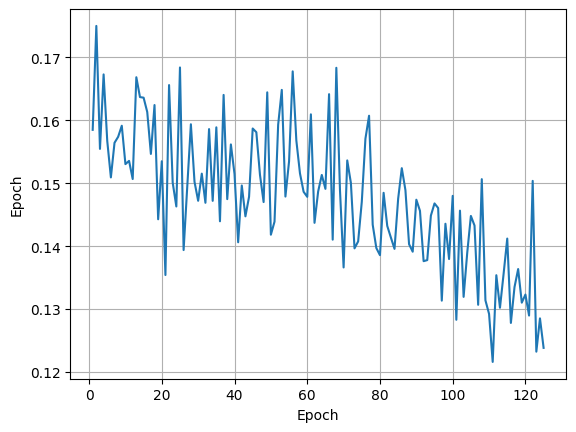

In [4]:
import re

with open(config.DATA_PATH / 'loss_log.txt') as f:
    logs = f.read()

pattern = r'Epoch (?P<epoch>\d+)/\d+.*Loss: (?P<loss>\d.\d+)'
matches = [m.groupdict() for m in re.finditer(pattern, logs)]
epoches = [int(m['epoch']) for m in matches]
losses =  [float(m['loss']) for m in matches]

plt.plot(epoches, losses)

plt.xlabel('Epoch')
plt.ylabel('Epoch')
plt.grid()

plt.savefig(config.IMAGES_PATH / 'other' / 'loss_log.png', dpi=300, bbox_inches='tight')

plt.show()

# Real images

In [3]:
core_games = pd.read_csv(config.DATA_PATH / 'core_annotations.csv')
core_games

filename  \
0    koajaesby7cmhujlcwkl.jpg   
1    poegvjadtys8fflxpxnu.jpg   
2    lrx26njeiciksjqby7ou.jpg   
3    vux5gzepdeqvhvm84rcz.jpg   
4    jlt7ncnm7cheka0hmypd.jpg   
..                        ...   
411  hh3dpuxkeg5sxt5etjyw.jpg   
412  cmsyualloecuawmj4dc2.jpg   
413  boaivf8bvafr9wohps1e.jpg   
414  amz80bteucdquadhxeoc.jpg   
415  dh6cylhwlb9lgn59ysya.jpg   

                                            annotation  
0    Game has genres: Shooter, Platform, Puzzle, Ad...  
1    Game has genres: Shooter, Platform, Puzzle, Ad...  
2    Game has genres: Shooter, Platform, Puzzle, Ad...  
3    Game has genres: Shooter, Platform, Puzzle, Ad...  
4    Game has genres: Shooter, Platform, Puzzle, Ad...  
..                                                 ...  
411  Game has genres: Shooter, Role-playing (RPG); ...  
412  Game has genres: Shooter, Role-playing (RPG); ...  
413  Game has genres: Shooter, Role-playing (RPG); ...  
414  Game has genres: Shooter, Role-playing (RPG); ...  
415  Game has genres: Shooter, Role-playing (RPG); ...  

[416 rows x 2 columns]

In [ ]:
# core = core_games.sample(9)

In [ ]:
# core.to_csv('core.csv', index=False)

In [25]:
core = pd.read_csv('core.csv')

In [26]:
size = 256
transform = transforms.Compose([
    transforms.Resize(size, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(size),
])

core_images = [transform(Image.open(config.IMAGES_PATH / 'similar-games' / filename)) for filename in core['filename'].array]

In [15]:
import random
from dataset import RetroGamesHelper

dataset_path = config.DATASET_PATH

r = RetroGamesHelper(dataset_path / "train", dataset_path / "train.csv")
games = r.get_games()
# frames = random.choice(r.get_game_captions(games[0]))
all_frames = list(r.get_all_frames())

In [ ]:
frames = random.choices(all_frames, k=9)
frames

In [ ]:
import textwrap

nrows = 3
ncols = 3

plt.figure(figsize=[12, 12])

for idx, img in enumerate(core_images):
    plt.subplot(nrows, ncols, idx + 1)
    annotation = core.iloc[idx]['annotation']
    wrapped = textwrap.fill(annotation, width=42)
    plt.title(wrapped, fontsize=10)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig('grid.png', dpi=300, bbox_inches='tight')
plt.show()

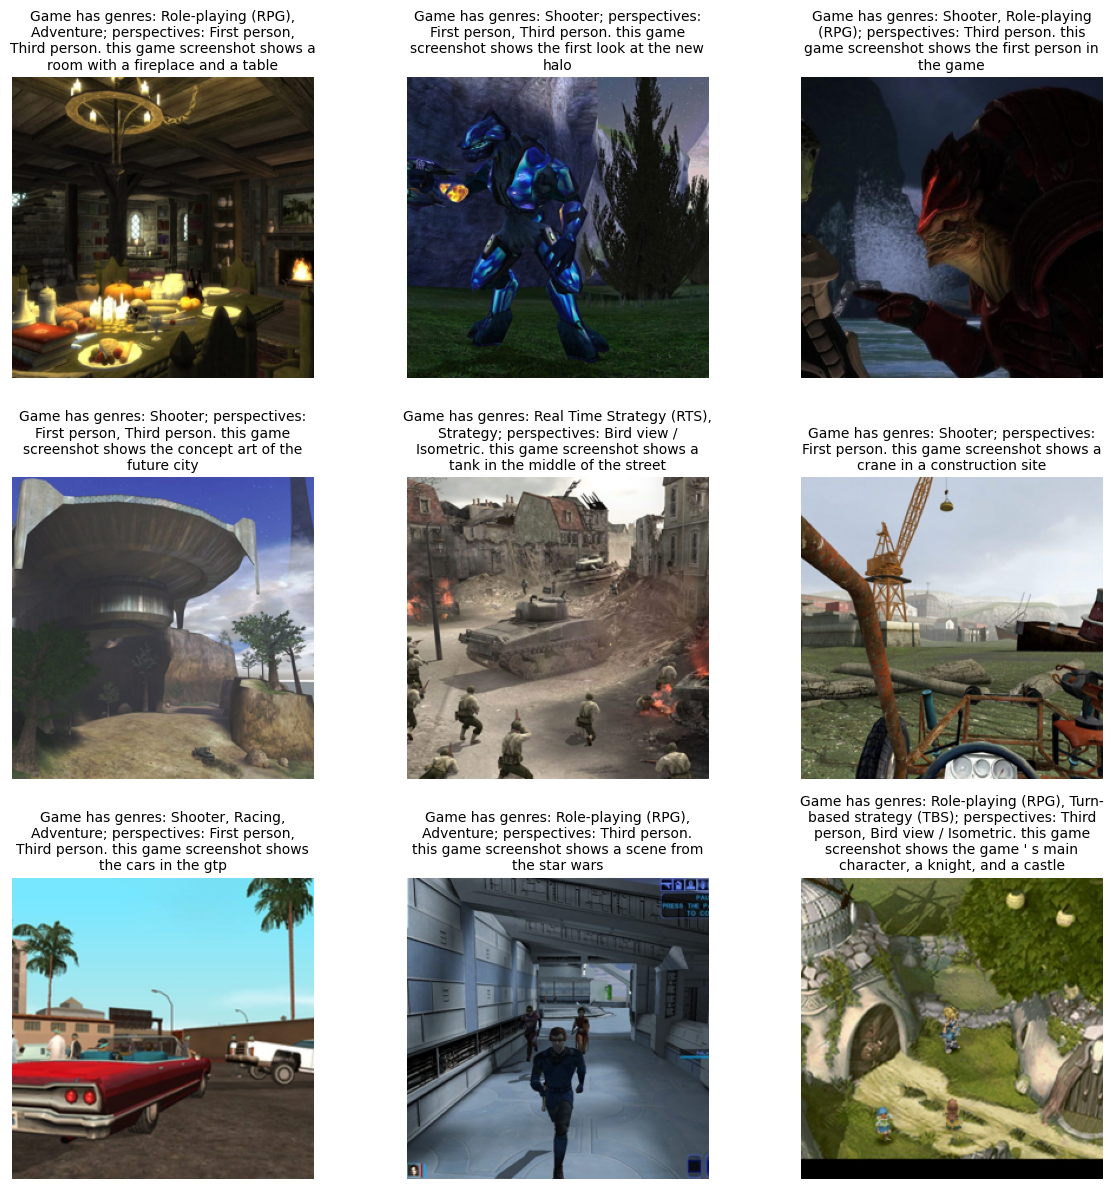

In [56]:
import textwrap

nrows = 3
ncols = 3

plt.figure(figsize=[12, 12])

for idx, img in enumerate(core_images):
    plt.subplot(nrows, ncols, idx + 1)
    annotation = core.iloc[idx]['annotation']
    wrapped = textwrap.fill(annotation, width=42)
    plt.title(wrapped, fontsize=10)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig(config.IMAGES_PATH / 'other' / 'grid.png', dpi=300, bbox_inches='tight')
plt.show()

# Generated images

In [51]:
image_ids = [
    "hdy2igffqonm4jfnmb7x.jpg",
    "scii1e.jpg",
    "gkeitv5e06gwtvv9wfr0.jpg",
    "kyq2a1vqbefcyzcxjeai.jpg",
    "sceh2u.jpg",
]

validation_anno = pd.read_csv(config.DATA_PATH / 'validation.csv')

games_to_show = validation_anno[validation_anno['filename'].apply(lambda x: x in image_ids)]
games_to_show

filename  \
8   hdy2igffqonm4jfnmb7x.jpg   
21                scii1e.jpg   
34  gkeitv5e06gwtvv9wfr0.jpg   
52  kyq2a1vqbefcyzcxjeai.jpg   
62                sceh2u.jpg   

                                           annotation  
8   Game has genres: Point-and-click, Puzzle, Adve...  
21  Game has genres: Shooter, Platform, Adventure;...  
34  Game has genres: Role-playing (RPG), Adventure...  
52  Game has genres: Real Time Strategy (RTS), Sim...  
62  Game has genres: Simulator, Sport; perspective...

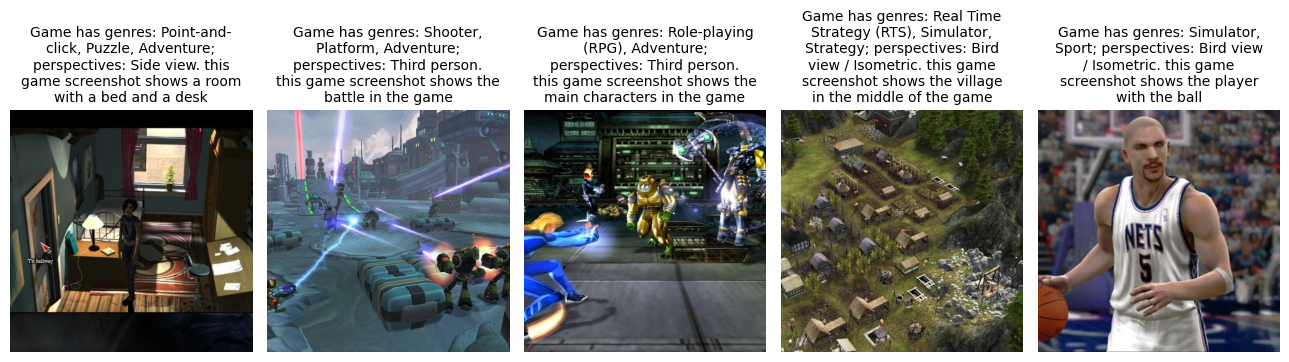

In [60]:
import textwrap

nrows = 1
ncols = 5

plt.figure(figsize=[13, 5])

for idx in range(len(games_to_show)):
    plt.subplot(nrows, ncols, idx + 1)

    annotation = games_to_show.iloc[idx]['annotation']
    img = Image.open(config.IMAGES_PATH / 'validation' / games_to_show.iloc[idx]['filename'])

    wrapped = textwrap.fill(annotation, width=30)

    plt.title(wrapped, fontsize=10)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig(config.IMAGES_PATH / 'other' / 'grid_real.png', dpi=300, bbox_inches='tight')
plt.show()

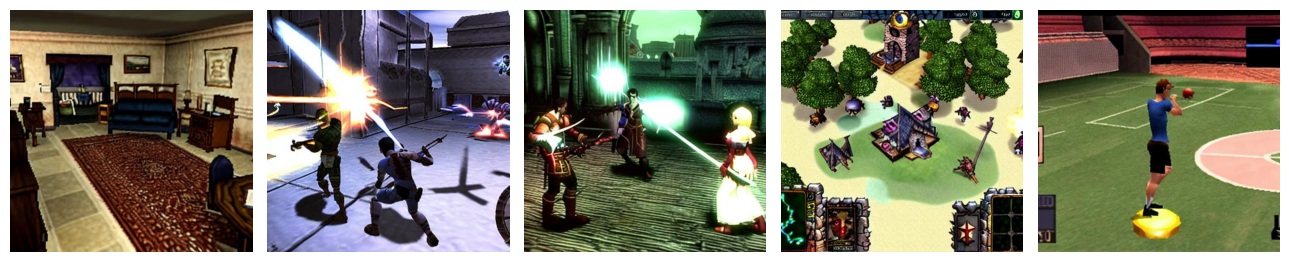

In [61]:
import textwrap

nrows = 1
ncols = 5

plt.figure(figsize=[13, 5])

for idx in range(len(games_to_show)):
    plt.subplot(nrows, ncols, idx + 1)

    annotation = games_to_show.iloc[idx]['annotation']
    img = Image.open(config.IMAGES_PATH / '512x512' / 'sd_trained_unet_epoch_110.pt' / games_to_show.iloc[idx]['filename'])

    # wrapped = textwrap.fill(annotation, width=30)

    # plt.title(wrapped, fontsize=10)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig(config.IMAGES_PATH / 'other' / 'grid_trained_100.png', dpi=300, bbox_inches='tight')
plt.show()

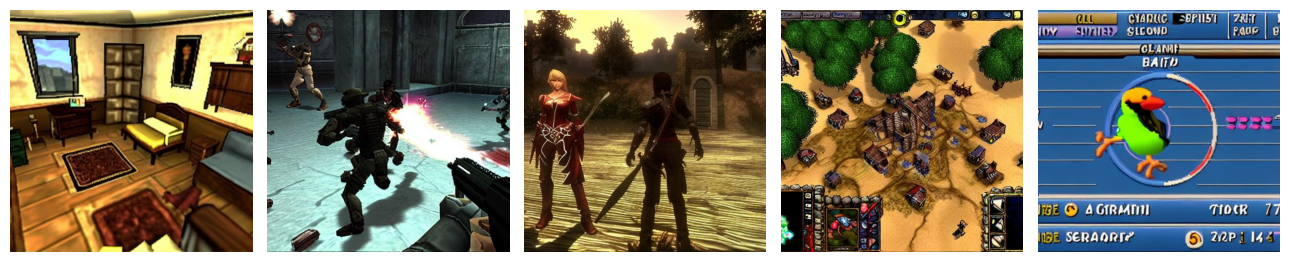

In [62]:
import textwrap

nrows = 1
ncols = 5

plt.figure(figsize=[13, 5])

for idx in range(len(games_to_show)):
    plt.subplot(nrows, ncols, idx + 1)

    annotation = games_to_show.iloc[idx]['annotation']
    img = Image.open(config.IMAGES_PATH / '512x512' / 'sd_trained_unet_epoch_50.pt' / games_to_show.iloc[idx]['filename'])

    # wrapped = textwrap.fill(annotation, width=30)
    # plt.title(wrapped, fontsize=10)

    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.savefig(config.IMAGES_PATH / 'other' / 'grid_trained_50.png', dpi=300, bbox_inches='tight')
plt.show()